# Predicting Students Maths Performance

## Table Of Contents
- [Introduction](#Introduction)
    - [Dataset Source](#DatasetSource)
    - [Dataset Details](#DatasetDetails)
    - [Dataset Variables](#DatasetVariables)
    - [Response Variable](#ResponseVariable)
    
- [Goals & Objectives](#Goals&Objectives)

- [Data Cleaning & Preprocesseing](#DataCleaning&Preprocesseing)

- [Data Exploration & Visualisation](#DataExploration&Visualisation)
    - [Literature Review](#LiteratureReview)
    
- [Summary & Conclusions](#Summary&Conclusions)

- [References](#References)

## Introduction <a id="Introduction"></a>

### Dataset Source <a id="DatasetSource"></a>

The dataset used in this study was obtained from Kaggle. This dataset includes the Maths grades of secondary school students in two Portuguese schools.

### Dataset Details <a id="DatasetDetails"></a>

This dataset is about the Final Math scores of secondary school students. In the dataset we have different features such as: the school of the students, the gender of the students, the age of students, the students home address, the students parents relationship status, the amount of time students study in a week, the number of classes the students had failed previously, the final Maths score achieved, and more. These features should be adequate for a linear regression problem on the students final scores.

The dataset has a total of 33 features (columns before dropping anything) and 395 observations (rows).

We will retrieve the dataset from our own devices by reading it since we have the csv file (the dataset) in the same folder as this jupyter notebook file.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import requests
import io 

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.style.use("seaborn")

import seaborn as sns


pd.set_option('display.max_columns', None)


In [2]:
# reading the csv file and naming it 'Maths_Scores'
Maths_Scores = pd.read_csv('Maths.csv')


In [3]:
Maths_Scores.sample(10, random_state=643)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
355,MS,F,18,U,GT3,T,3,3,services,services,course,father,1,2,0,no,yes,no,no,yes,yes,no,yes,5,3,4,1,1,5,0,10,9,9
50,GP,F,16,U,LE3,T,2,2,services,services,course,mother,3,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,2,3,4,2,12,13,13
265,GP,M,18,R,LE3,A,3,4,other,other,reputation,mother,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,2,5,3,4,1,13,17,17,17
263,GP,F,17,U,GT3,T,3,3,other,other,home,mother,1,3,0,no,no,no,yes,no,yes,no,no,3,2,3,1,1,4,4,10,9,9
375,MS,F,18,R,GT3,T,1,1,other,other,home,mother,4,3,0,no,no,no,no,yes,yes,yes,no,4,3,2,1,2,4,2,8,8,10
106,GP,F,15,U,GT3,T,2,2,other,other,course,mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,5,1,2,1,1,3,8,7,8,8
207,GP,F,16,U,GT3,T,4,3,teacher,other,other,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,1,3,2,1,1,1,10,11,12,13
349,MS,M,18,R,GT3,T,3,2,other,other,course,mother,2,1,1,no,yes,no,no,no,yes,yes,no,2,5,5,5,5,5,10,11,13,13
295,GP,M,17,U,GT3,T,3,3,health,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,4,3,1,3,5,4,14,12,11
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0


### Dataset Variables <a id="DatasetVariables"></a>

The variables or features we are going to use in our report are shown in the table below.

In [4]:
from tabulate import tabulate

Variable_table = [['Name','Data Type','Units','Description'],
                 ['school', 'Nominal categorical', 'NA', 'The school that the student attends (GP or MS)'],
                 ['sex', 'Nominal categorical', 'NA', 'The sex of the student (M/Male or F/Female)'],
                 ['age', 'Numerical', 'Years', 'Age of the student'],
                 ['studytime', 'Ordinal categorical', 'Hours', 'Number of hours the student studies per week:\n 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours,\n or 4 - >10 hours'],
                 ['Medu', 'Ordinal categorical', 'NA', 'Highest level of mother\'s education: \n0 - none, 1 - primary education (4th grade), \n2 - 5th to 9th grade, \n3 - secondary education or 4 - higher education'],
                 ['Fedu', 'Ordinal categorical', 'NA', 'Highest level of father\'s education: \n0 - none, 1 - primary education (4th grade), \n2 - 5th to 9th grade, \n3 - secondary education or 4 - higher education'],
                 ['failures', 'Numerical', 'NA', 'Number of courses the student has failed previously: \nn if 0<=n<=3, else 4'],
                 ['absences', 'Numerical', 'NA', 'Number of times the student was absent'],
                 ['famrel', 'Ordinal categorical', 'NA', 'Quality of family relationships (from 1 - very bad to 5 - excellent)'],
                 ['Pstatus', 'Nominal categorical', 'NA', 'Parent\'s cohabitation status (\'T\' - living together or \'A\' - apart)'],
                 ['G3', 'Numerical', 'NA', 'Final Maths grade (0 - 20)']]


print(tabulate(Variable_table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤═════════════════════╤═════════╤══════════════════════════════════════════════════════════════════════╕
│ Name      │ Data Type           │ Units   │ Description                                                          │
╞═══════════╪═════════════════════╪═════════╪══════════════════════════════════════════════════════════════════════╡
│ school    │ Nominal categorical │ NA      │ The school that the student attends (GP or MS)                       │
├───────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────┤
│ sex       │ Nominal categorical │ NA      │ The sex of the student (M/Male or F/Female)                          │
├───────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────┤
│ age       │ Numerical           │ Years   │ Age of the student                                                   │
├───────────┼─────────────────────┼─────────┼───────────────────

### Response Variable <a id="ResponseVariable"></a>

The target variable for this report is 'G3' which is the final maths grade of the students. We will examine how the final maths grade changes based on the different explanatory variables.

## Goals & Objectives <a id="Goals&Objectives"></a>

## Data Cleaning & Preprocesseing <a id="DataCleaning&Preprocesseing"></a>

## Data Exploration & Visualisation <a id="DataExploration&Visualisation"></a>

Since, we have cleared and preprocessed our data according to our goal now we are going to explore and visualise the important features of the dataset.

## Univariate visualisation of important variables

### Histogram of studytime of students

As we can see from the histogram below, 2 hours is the most comman studytime among students.

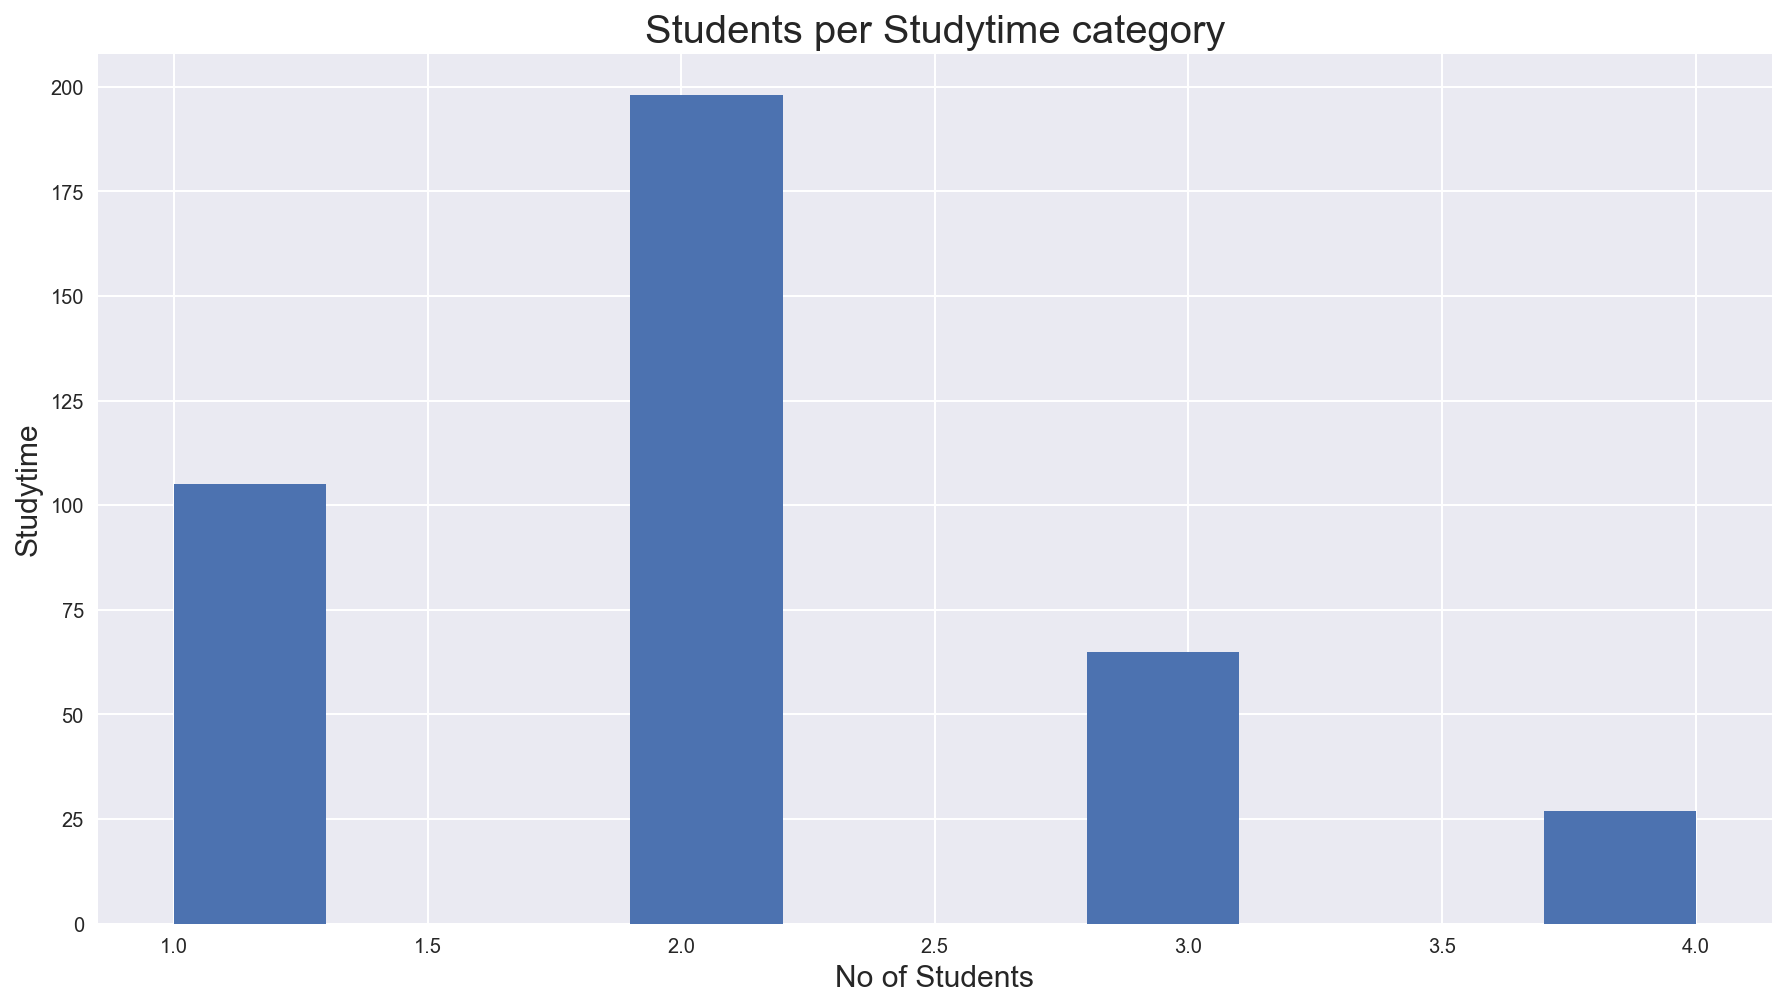

In [12]:
plt.figure(figsize = (15, 8))
data = Maths_Scores['studytime']
plt.hist(data)
plt.xlabel('No of Students', fontsize = 15)
plt.ylabel('Studytime', fontsize = 15)
plt.title('Students per Studytime category', fontsize = 20)
plt.show()

### Boxplot of Students  Maths Grades

As we can see from the boxplots of math grades throughout term1, term2 and term3,  the median math grade of the class has roughly been between 10 and 11.

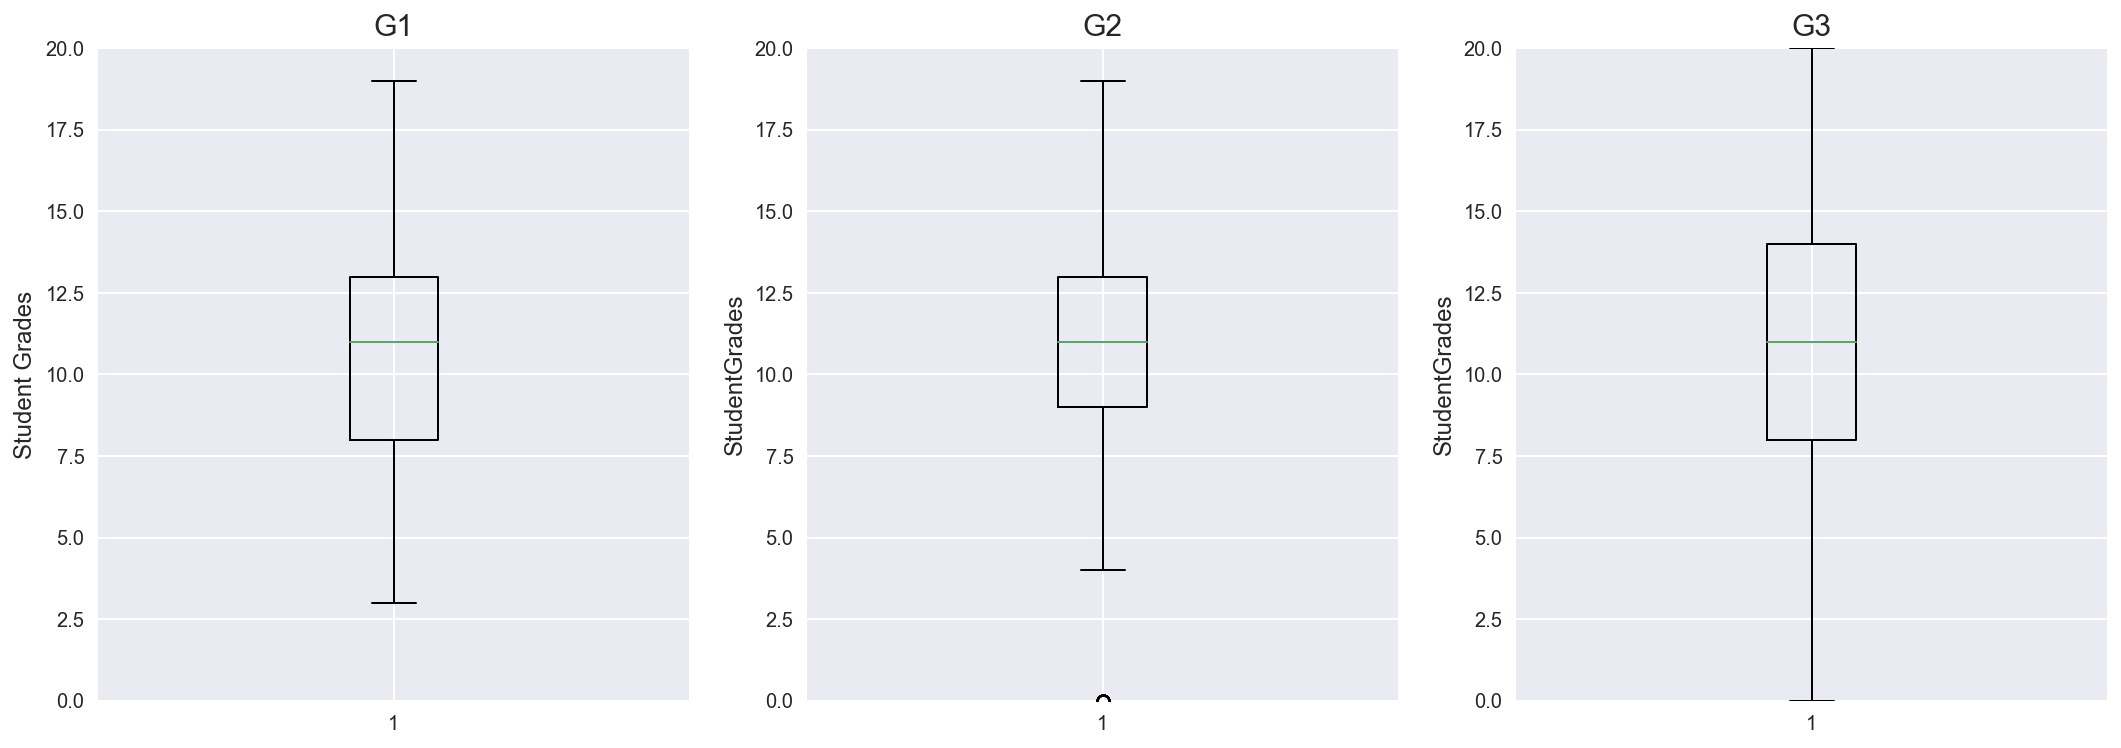

In [13]:
plt.figure(figsize = (18, 6))

plt.subplot(1, 3, 1)
plt.ylim(0, 20)
plt.boxplot(x = Maths_Scores['G1'])
plt.ylabel('Student Grades', fontsize = 12)
plt.title('G1', fontsize = 15)

plt.subplot(1, 3, 2)
plt.ylim(0, 20)
plt.boxplot(x = Maths_Scores['G2'])
plt.ylabel('StudentGrades', fontsize = 12)
plt.title('G2', fontsize = 15)

plt.subplot(1, 3, 3)
plt.ylim(0, 20)
plt.boxplot(x = Maths_Scores['G3'])
plt.ylabel('StudentGrades', fontsize = 12)
plt.title('G3', fontsize = 15)

plt.show()

### Pie chart of relativie proportion of Male vs Female in the class

As we can see from the pie chart there is a relative equal distribution of Male vs Female students in the class.

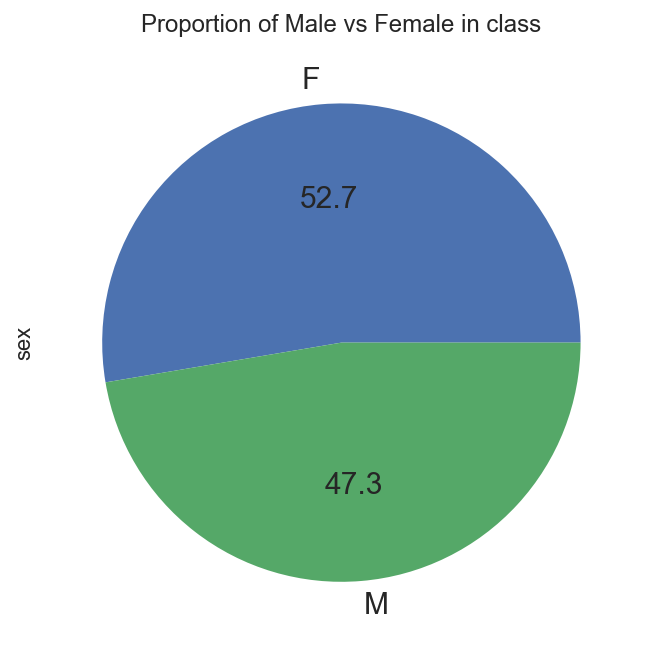

In [14]:
Maths_Scores['sex'].value_counts().plot(kind= 'pie', autopct='%.1f', title = 'Proportion of Male vs Female in class', fontsize = 15)
plt.show();

### Histogram of absences of students

As we call see from the histogram below, most of the students have less than 10 days of absence.

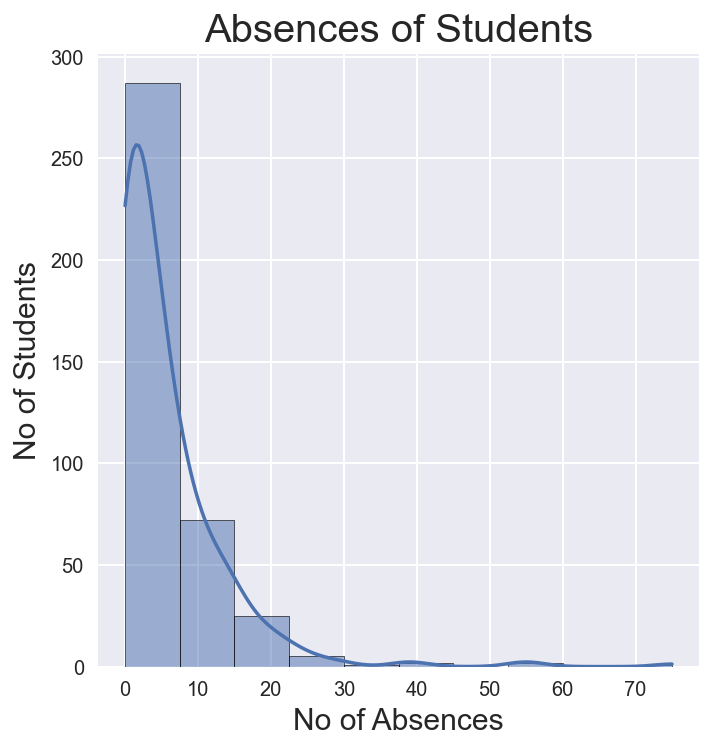

In [15]:
sns.displot(Maths_Scores['absences'], kde = True, bins = 10)
plt.title('Absences of Students', fontsize = 20)
plt.xlabel('No of Absences', fontsize = 15)
plt.ylabel('No of Students', fontsize = 15)
plt.show();

### Barchart of parents level of education

Below, is are barcharts representing the level of education of each parent separately, we can see from the graph that most of the students have parents who have education upto middle grade or above(i.e 2 or above).

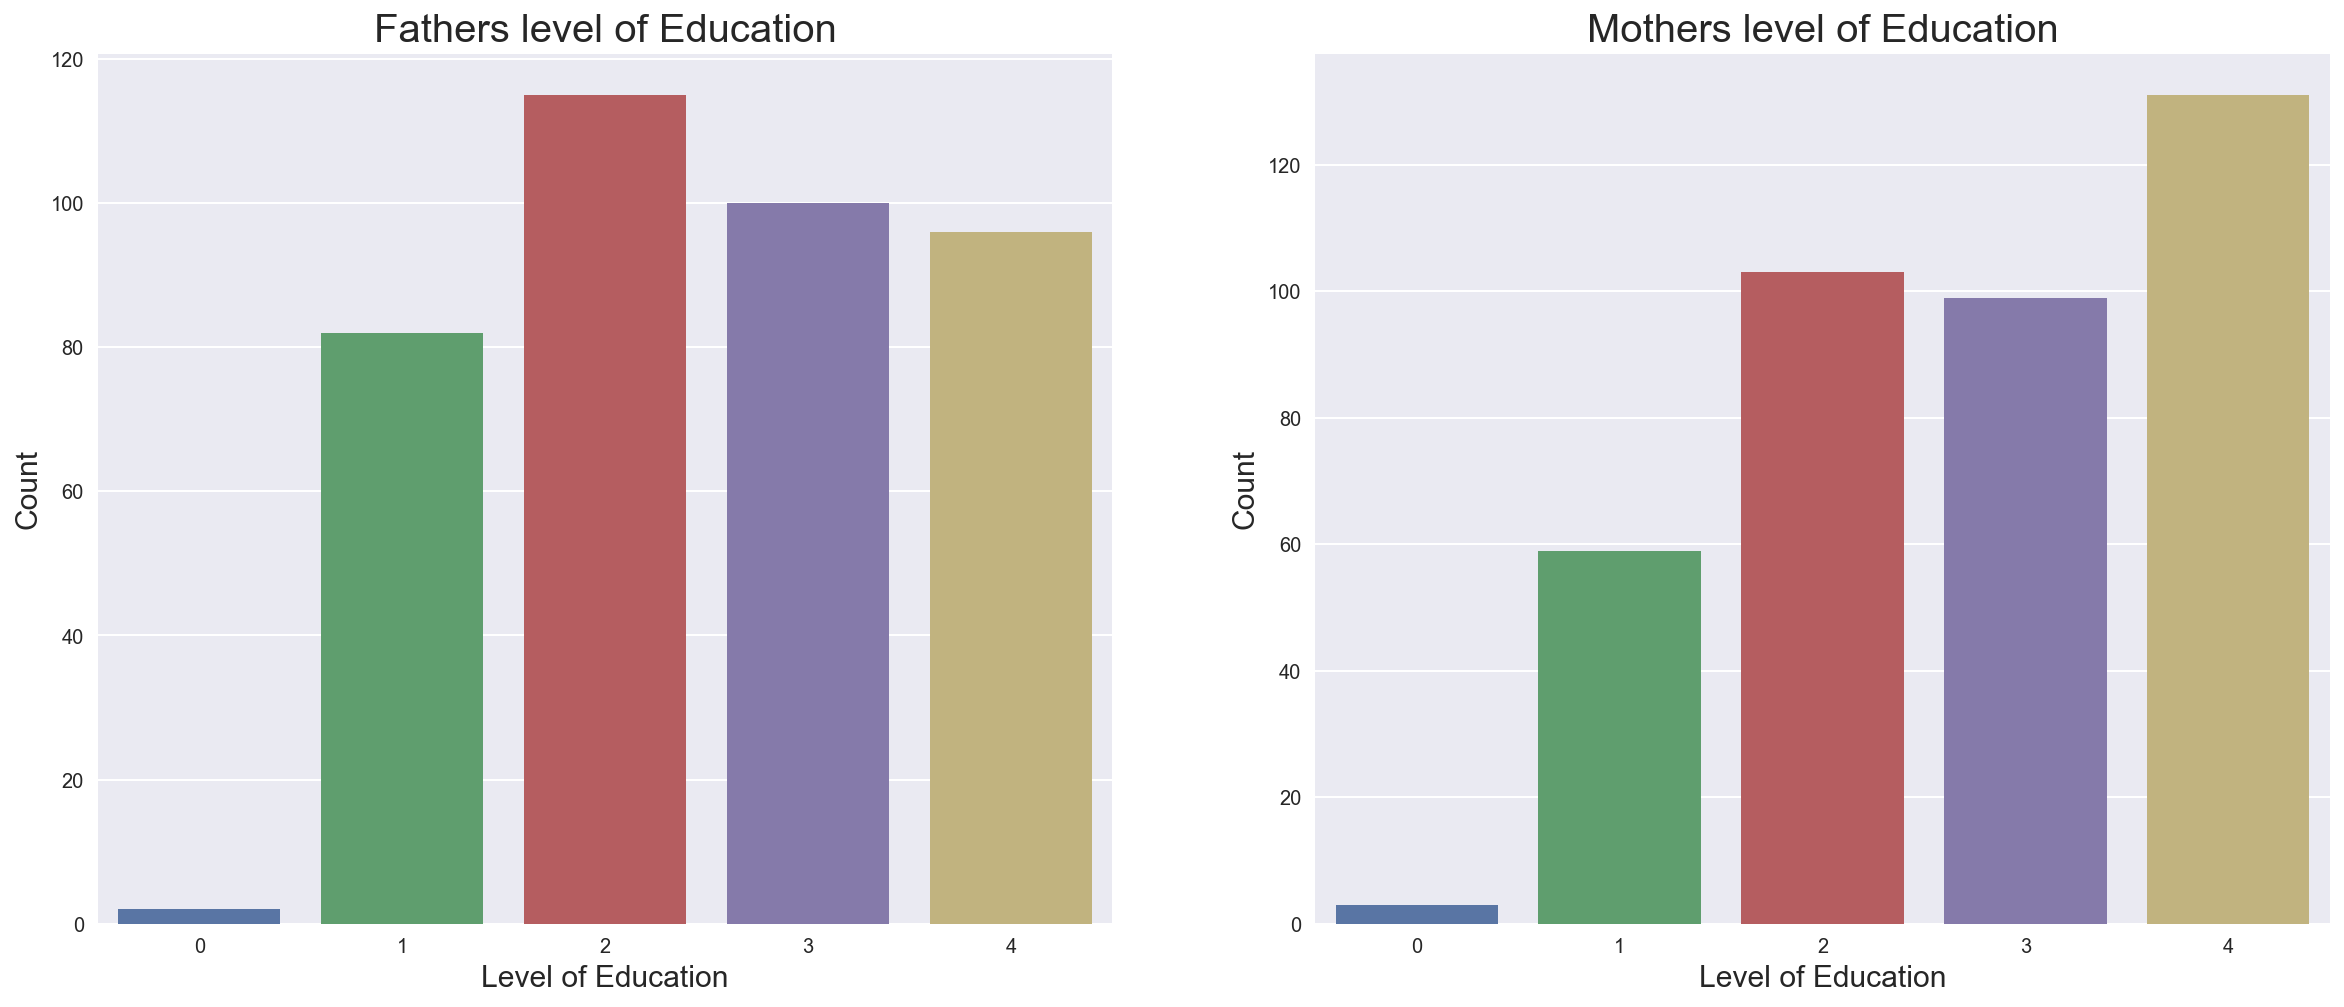

In [16]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Fedu', data = Maths_Scores)
plt.xlabel('Level of Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Fathers level of Education', fontsize = 20)

plt.subplot(1, 2, 2)
sns.countplot(x = 'Medu', data = Maths_Scores )
plt.xlabel('Level of Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Mothers level of Education', fontsize = 20)

plt.show();

### Pie chart representing the proportion of students in proportion to the number of courses they failed

From the pie chart given below we can see that nearly 79 percent of students haven't failed in even a single course.

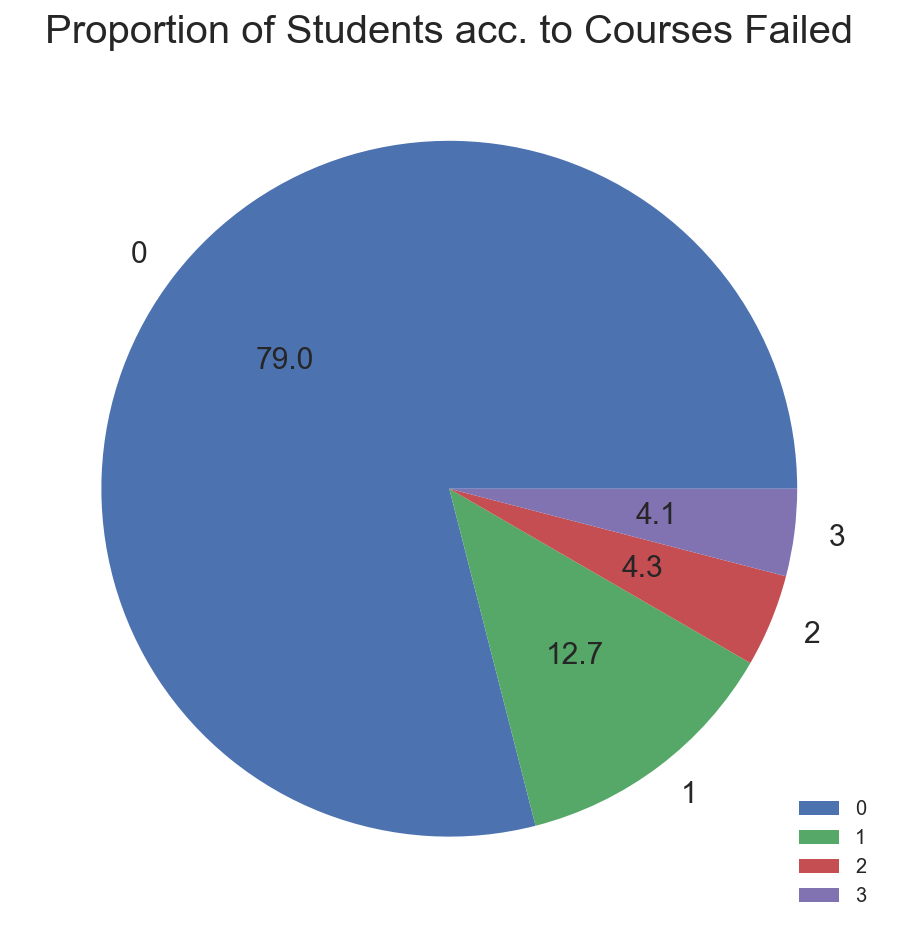

In [111]:
plt.figure(figsize = (12, 8))
Maths_Scores['failures'].value_counts().plot(kind= 'pie', autopct='%.1f', fontsize = 15)
plt.title('Proportion of Students acc. to Courses Failed', fontsize = 20)
plt.ylabel('')
plt.legend(loc ='lower right')
plt.show();

## Two-Variable Visualisaiton  of goal-oriented data comparisions

Now, we'd like to show you some interesting two-variable visualisation of the dataset.

### Boxplot of Students Marks broken according to gender

As we can see from boxplot below, that Male students have a slightly higher score compared to the Female students.

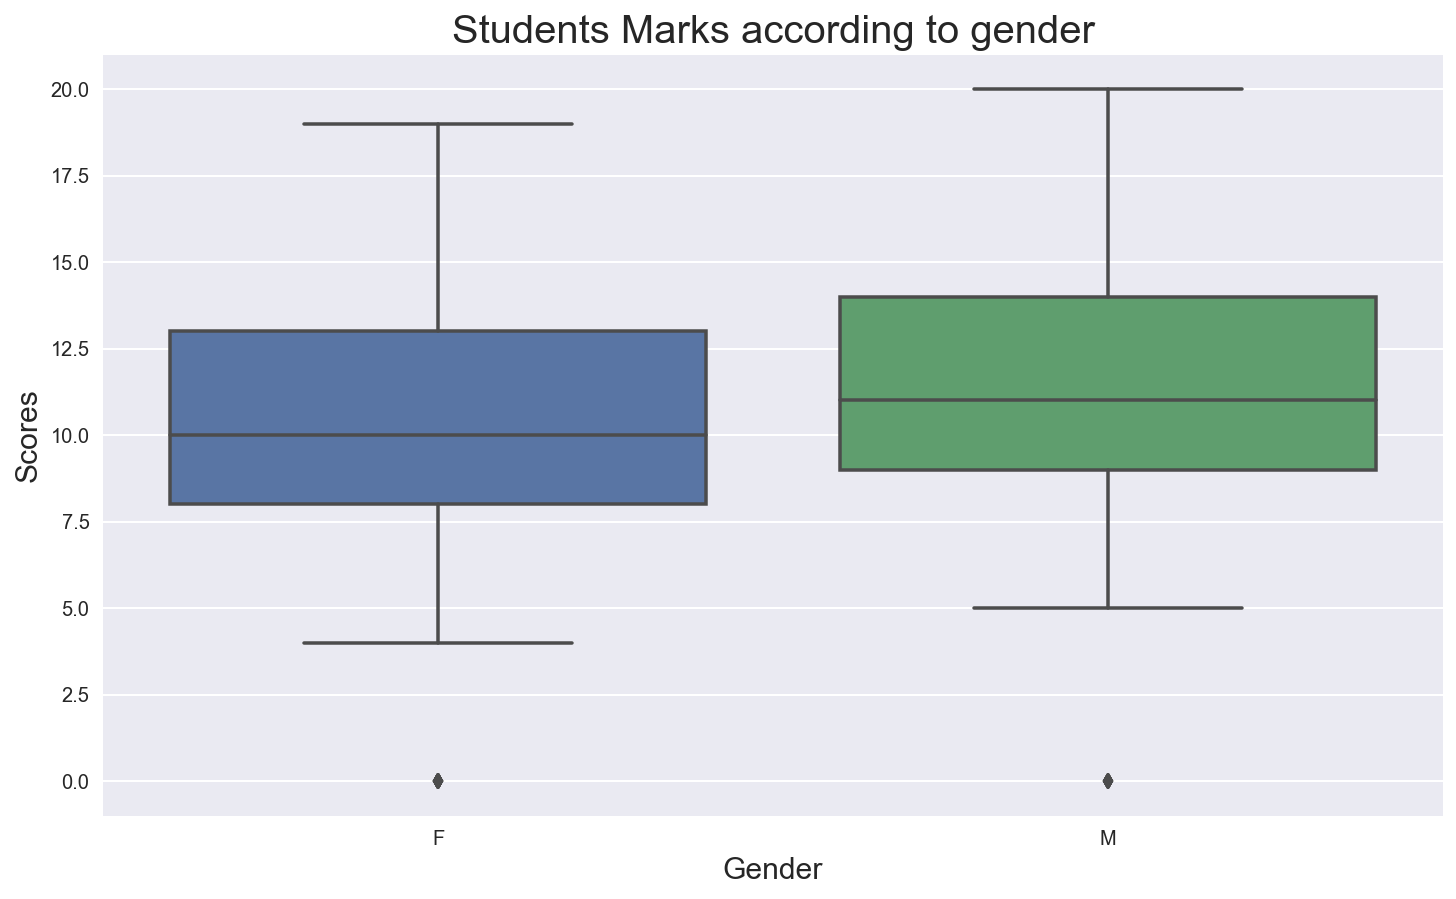

In [121]:
#FIX ME: Replace G3 with Avg if created

plt.figure(figsize = (12, 7))
sns.boxplot(x = 'sex', y = 'G3', data = Maths_Scores)
plt.title('Students Marks according to gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show();

### Boxplots of Marks compared to Study time

As we can clearly see from the boxplots below that students who tend to dedicate more hours for studies tend to score more marks.

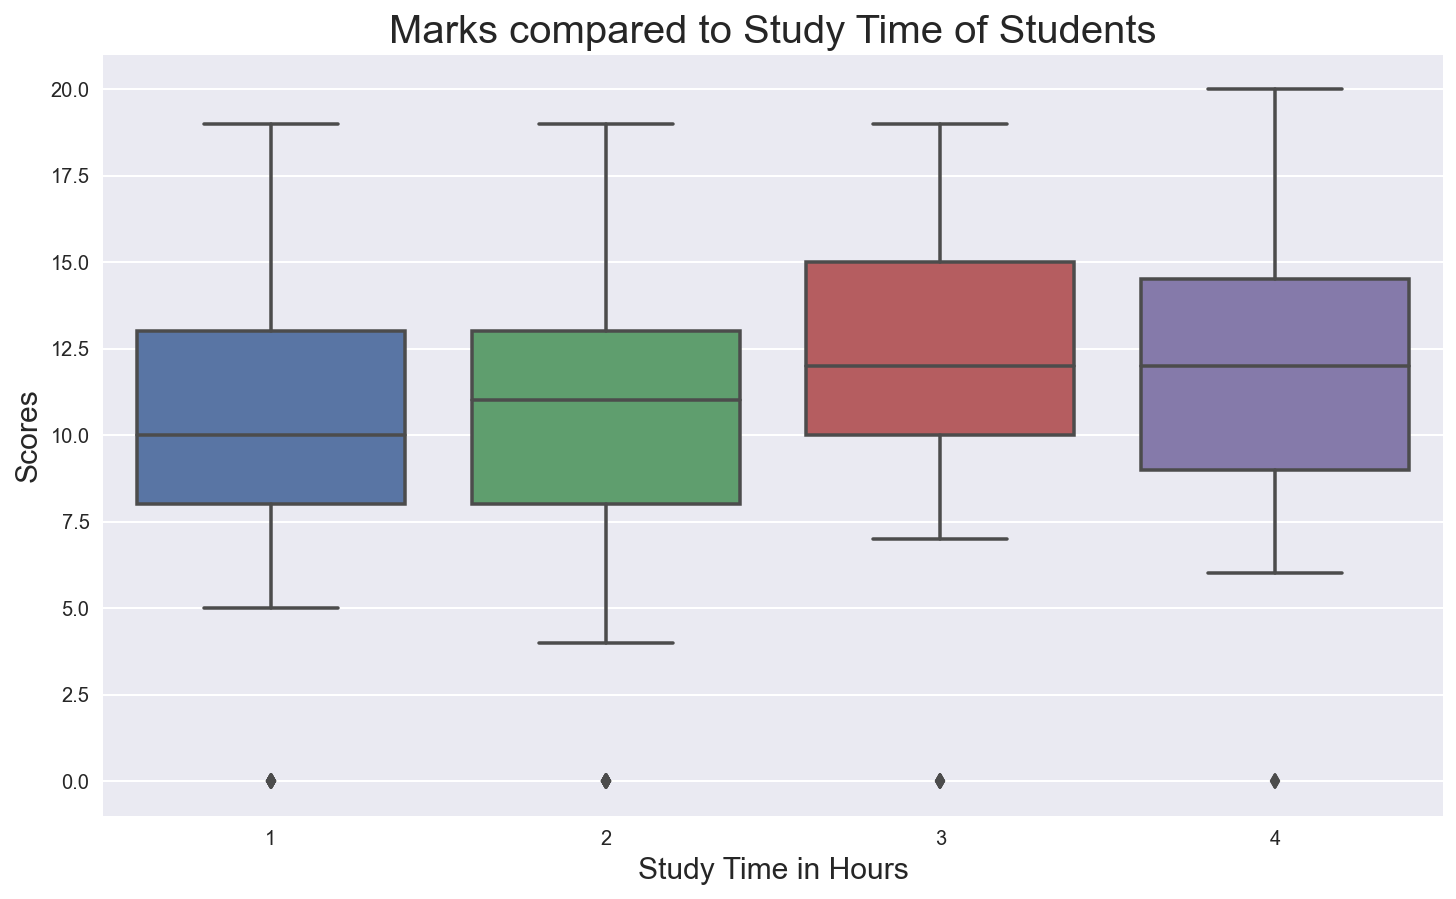

In [128]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'studytime', y = 'G3', data = Maths_Scores)
plt.title('Marks compared to Study Time of Students', fontsize = 20)
plt.xlabel('Study Time in Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show();


## Scatterplot to compare marks of students to the no. of absences

As we can see from the scatterplot that a student who has more No. of absences is more likely to score less.

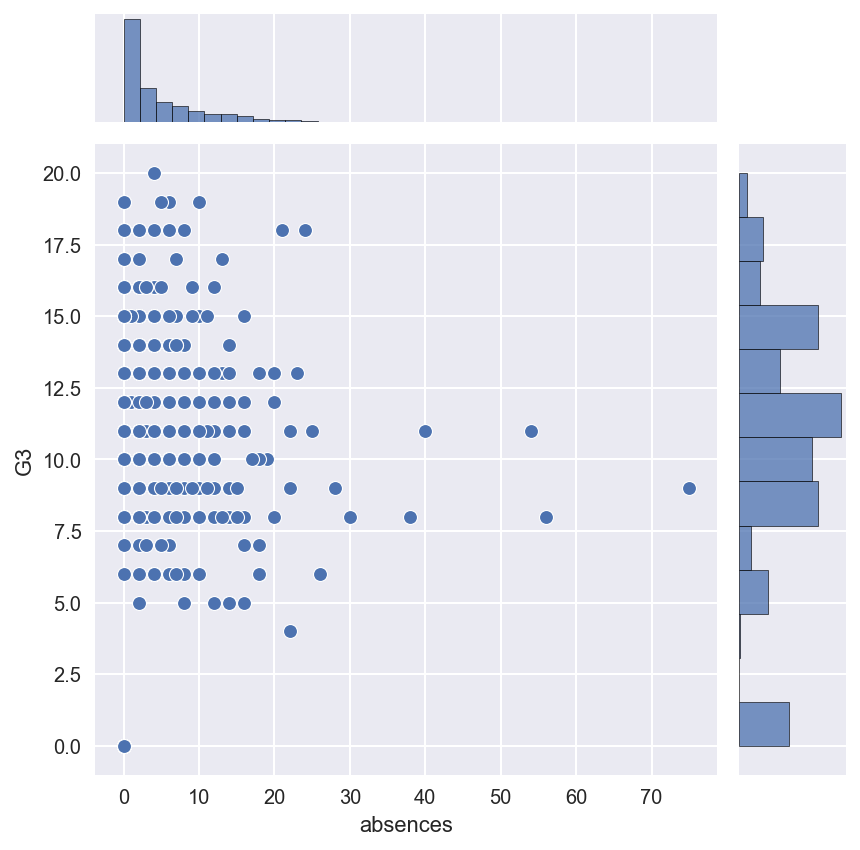

In [148]:
#FIX ME: Replace G3 with Avg if created

sns.jointplot(x="absences", y="G3", data=Maths_Scores);
plt.show();

## Boxplot to compare Student marks to quality of family relationship

From the give Boxplot we can clearly see tehre is no significant difference between the marks a student obtains and the quality of their family relationships.

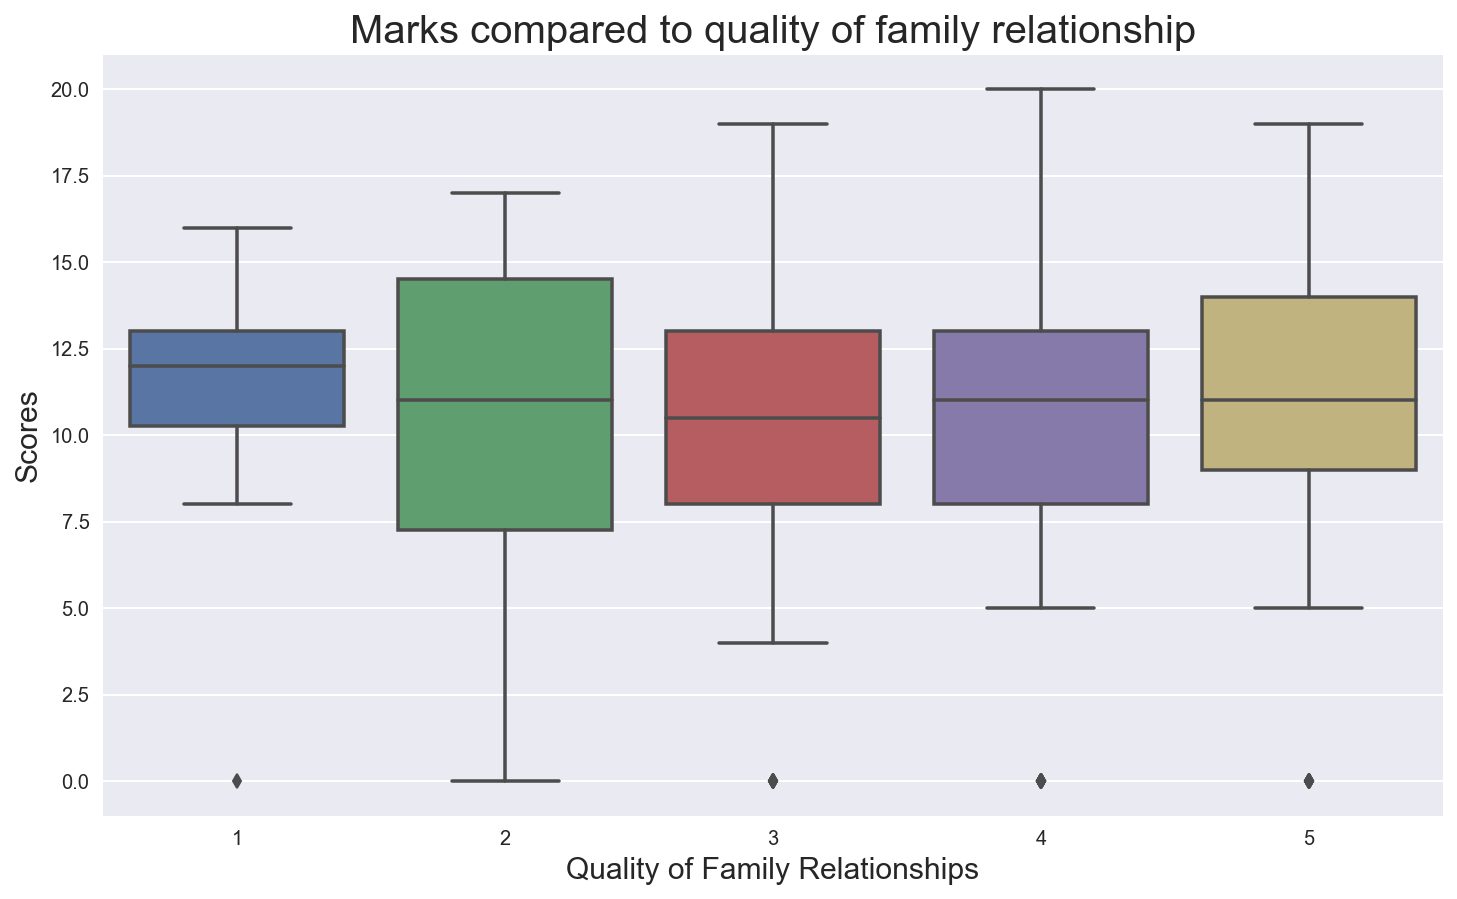

In [152]:
#FIX ME: Replace G3 with avg if created
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'famrel', y = 'G3', data = Maths_Scores)
plt.title('Marks compared to quality of family relationship', fontsize = 20)
plt.xlabel('Quality of Family Relationships', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show();


## Line chart to compare the performance of students based on their School

We can deduce from the graph below that there is no significant difference between performance of students from both the schools.

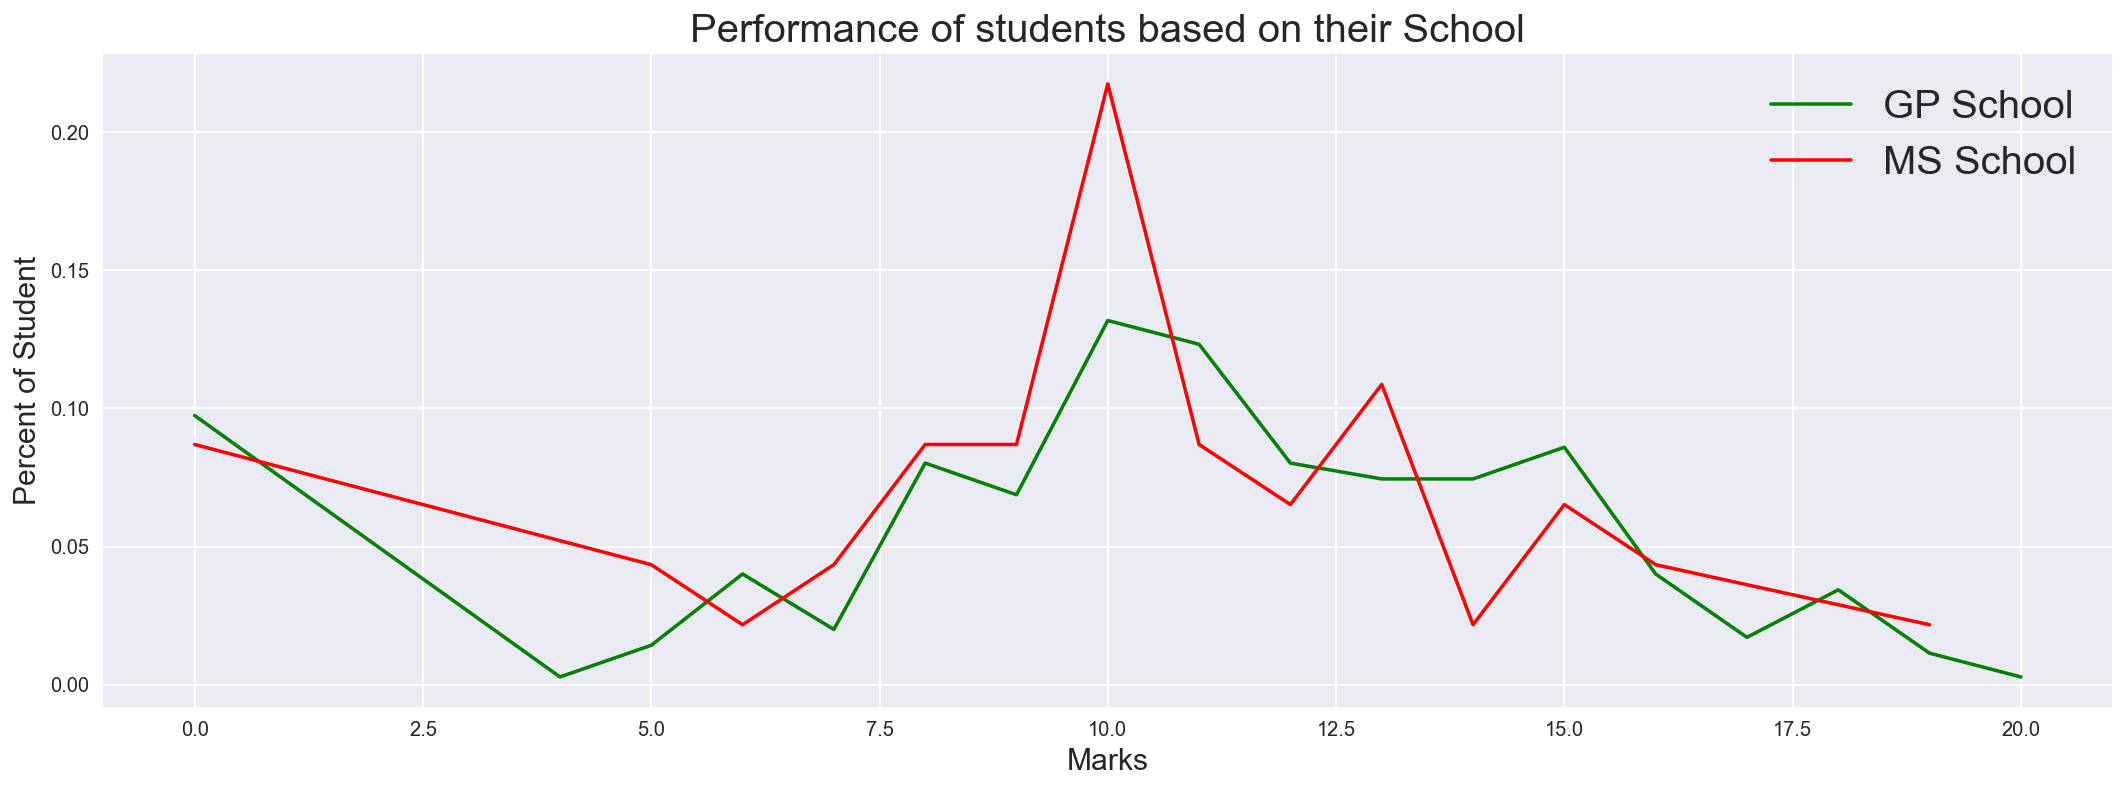

In [188]:
#FIX ME: Replace G3 with average if created
No_Std_GP = Maths_Scores[Maths_Scores['school'] == 'GP']['G3'].shape[0]
No_Std_MS = Maths_Scores[Maths_Scores['school'] == 'MS']['G3'].shape[0]

data_GP = Maths_Scores[Maths_Scores['school'] == 'GP']['G3'].value_counts().sort_index()/No_Std_GP
data_MS = Maths_Scores[Maths_Scores['school'] == 'MS']['G3'].value_counts().sort_index()/No_Std_MS

plt.figure(figsize = (18, 6))
plt.plot(data_GP, color = 'green',label = "GP School")
plt.plot(data_MS, color = 'red',label = "MS School")

plt.title("Performance of students based on their School", fontsize = 20)
plt.xlabel("Marks", fontsize = 15)
plt.ylabel("Percent of Student", fontsize = 15)
plt.legend(loc = 'upper right', fontsize = 20)

plt.show();

## Histogram to compare marks of students with and without extra educational support from their families or school

It can be clearly deduced that a larger proportion of students who don't have extra educational support from their family or school tend to do achieve more marks.

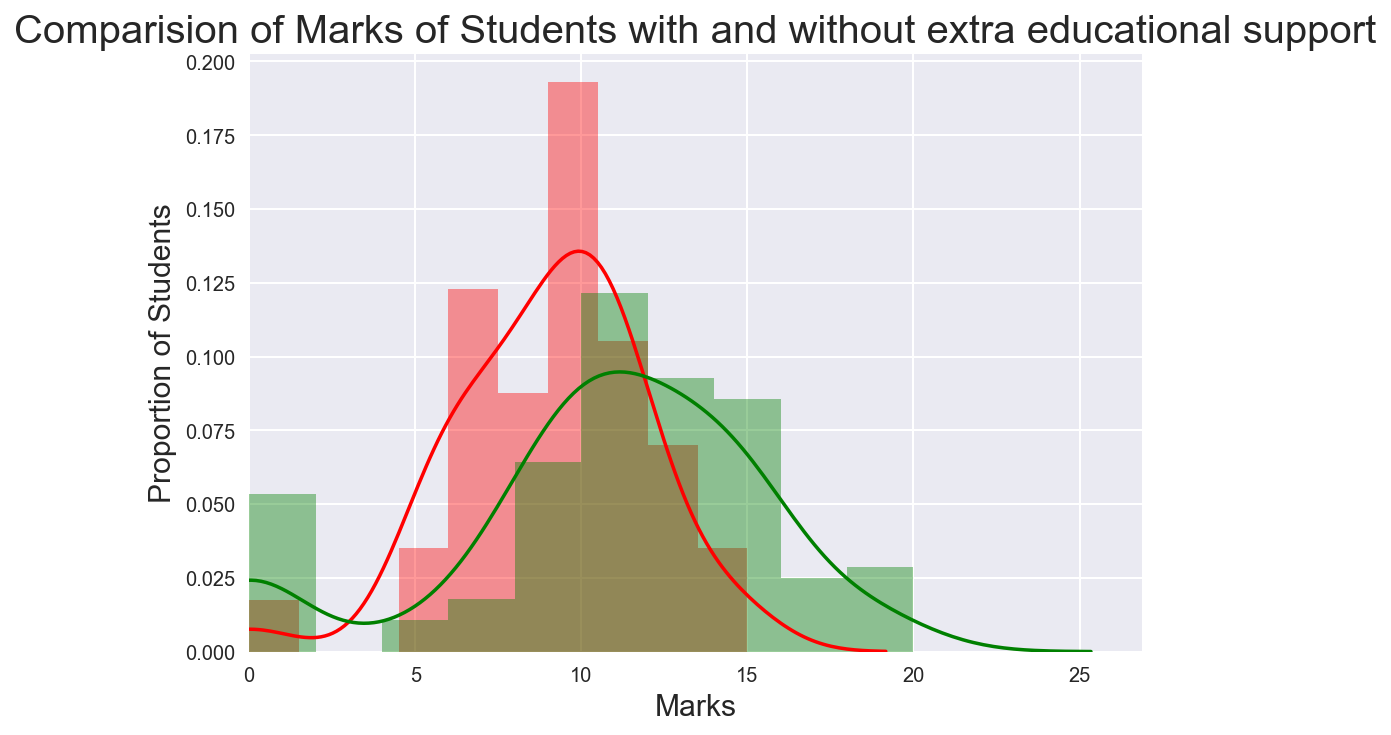

In [210]:
#FIX ME: Replace G3 with Avg if created

data_sup  = Maths_Scores[(Maths_Scores['famsup'] == 'yes') & (Maths_Scores['schoolsup'] == 'yes')]['G3']
sns.distplot(data_sup, kde = True, bins = 10, color = 'r')

data_nosup  = Maths_Scores[(Maths_Scores['famsup'] == 'no') & (Maths_Scores['schoolsup'] == 'no')]['G3']
sns.distplot(data_nosup, kde = True, bins = 10, color = 'g')

plt.xlim(0, None)
plt.title('Comparision of Marks of Students with and without extra educational support', fontsize = 20)
plt.xlabel('Marks', fontsize = 15)
plt.ylabel('Proportion of Students', fontsize = 15)
plt.show();

## Three-Variable Visualisation

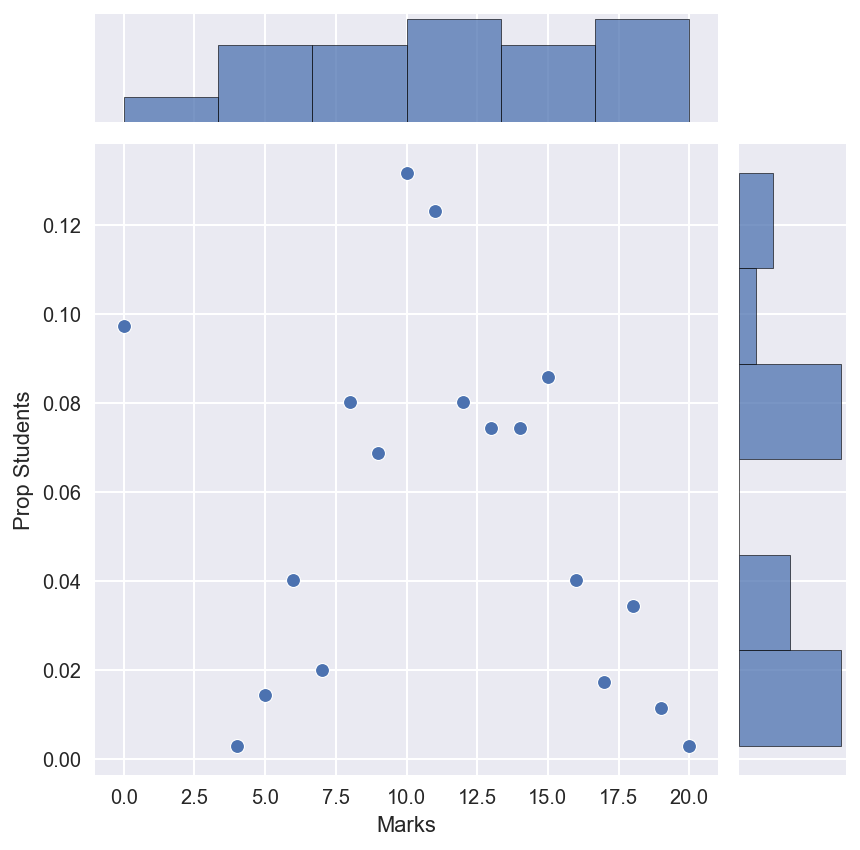

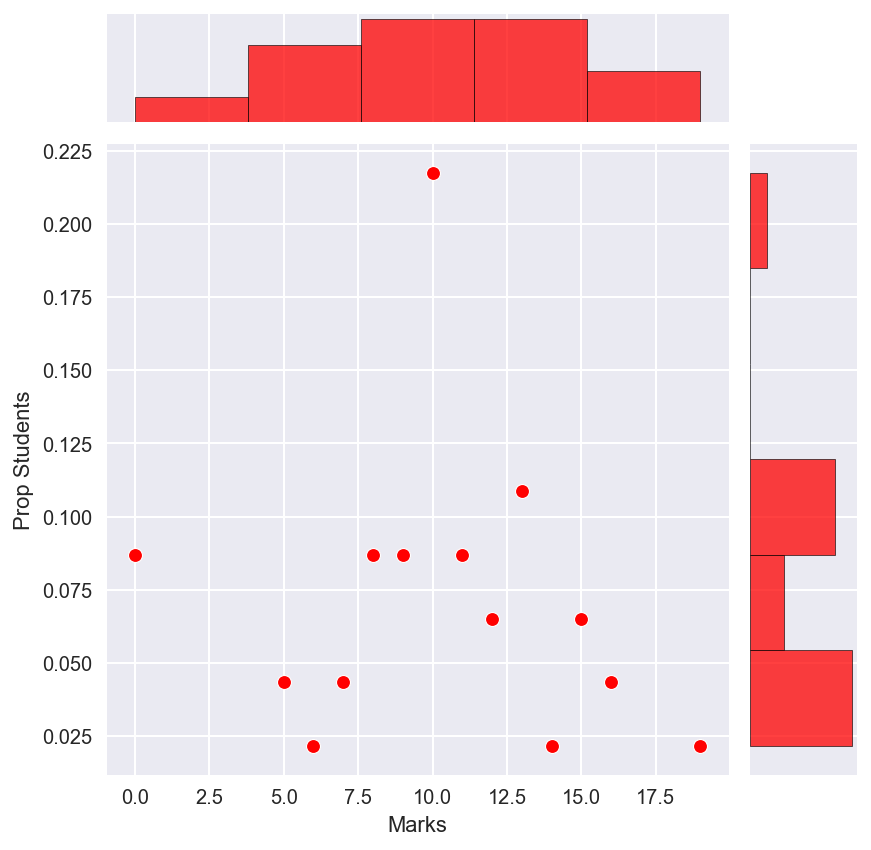

In [239]:
#FIX ME: Replace G3 with Avg if created
No_Std_GP = Maths_Scores[Maths_Scores['school'] == 'GP']['G3'].shape[0]
No_Std_MS = Maths_Scores[Maths_Scores['school'] == 'MS']['G3'].shape[0]

data_GP = Maths_Scores[Maths_Scores['school'] == 'GP']['G3'].value_counts().sort_index()/No_Std_GP
data_MS = Maths_Scores[Maths_Scores['school'] == 'MS']['G3'].value_counts().sort_index()/No_Std_MS

new_data_GP = pd.DataFrame({'Prop Students': data_GP, 'Marks': data_GP.index.tolist()})
new_data_MS = pd.DataFrame({'Prop Students': data_MS, 'Marks': data_MS.index.tolist()})

sns.jointplot(x = 'Marks', y = 'Prop Students', data = new_data_GP)
sns.jointplot(x = 'Marks', y = 'Prop Students', data = new_data_MS, color = 'red')
plt.show();

### Literature Review <a id="LiteratureReview"></a>

## Summary & Conclusions <a id="Summary&Conclusions"></a>

## References <a id="References"></a>

- kaggle.com. (n.d.). Student performance in Maths. [online] Available at: https://www.kaggle.com/code/parvinderkaur21/student-performance-in-maths/data [Accessed 29 Sep. 2022].
